sample size :       15
mean :              41.266666666666666
median :            43.0
min value :         5
max value :         87
range :             82
standard deviation: 25.632011235952593
variance: 657
mode: 5
Quartiles
Q1: 21.0
Q2: 43.0
Q3: 55.5
Skew Coefficient: -0.20287132180662643


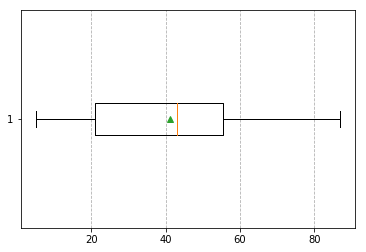

In [73]:
from statistics import mode, variance, pvariance, stdev, pstdev
import numpy as np
from matplotlib import pyplot as plt

#TODO
# Identify Nominal, Ordinal and metric data

def descriptiveAnalysis(x, isSample=True, showOutput=False):
    '''Performs basic analysis on a data set, 
       calculates mean, median, standard deviation, etc.
       
       Inputs
       -------
       x : numpy.array object
           The dataset
       isSample : Boolean (True/False)
           Some statistical calculations depend upon whether 
           the data is sample or population data
       showOutput : Boolean (True/False)
           Whether or not to print out the resulting statistics.
           Otherwise, the results will only be returned 
           as a dictionary.
           
       Outputs
       -------
       stats : dictionary
           Dictionary containing the calculated statistics
    '''

    # sample size
    size = x.size
    
    # range data
    x_min = np.min(x)
    x_max = np.max(x)
    r = x_max - x_min
    
    # Quartiles
    q1 = np.percentile(x, 25)
    q2 = np.percentile(x, 50)
    q3 = np.percentile(x, 75)
    interquartileRange = q3 - q1


    m = np.mean(x)
    # Mode (most common number) is a robust measure of central location 
    # for nominal level data
    mo = mode(x)

    # The median is a robust measure of central location for ordinal level
    # data, and is less affected by the presence of outliers in your data. 
    # When the number of data points is odd, the middle data point is 
    # returned. When the number of data points is even, the median is 
    # interpolated by taking the average of the two middle values
    #
    # This is suited for when your data is discrete, and you don’t mind
    # that the median may not be an actual data point.
    #
    # If your data is ordinal (supports order operations) but not numeric 
    # (doesn’t support addition), you should use median_low() or
    # median_high() instead.
    me = np.median(x)
    

    if isSample:
        ## Sample Data
        s = stdev(x)
        # Variance, or second moment about the mean, is a measure of the 
        # variability (spread or dispersion) of data. A large variance 
        # indicates that the data is spread out; a small variance indicates 
        # it is clustered closely around the mean.
        v = variance(x) # == stdev**2
    else:
        ## Population Data
        s = pstdev(x)
        v = pvariance(x)

    # Pearson's second skewness coefficient (median skewness)
    skewCoefficient = 3 * (m - me) / s
    
    stats = {'size': size, 'mean': m, 'median': me, 'mode': mo, 
            'min': x_min, 'max': x_max, 'range': r, 'stdev': s, 
            'variance': v, 'q1': q1, 'q2': q2, 'q3': q3,
            'interquartileRange': interquartileRange,
            'skewCoefficient': skewCoefficient,}
    
    if showOutput:
        print("sample size :       {}".format(size),
              "mean :              {}".format(m),
              "median :            {}".format(me),
              "min value :         {}".format(x_min),
              "max value :         {}".format(x_max),
              "range :             {}".format(r),
              "standard deviation: {}".format(s),
              "variance: {}".format(v),
              "mode: {}".format(mo),
              "Quartiles",
              "Q1: {}".format(q1),
              "Q2: {}".format(q2),
              "Q3: {}".format(q3),
              "Skew Coefficient: {}".format(skewCoefficient), sep='\n')

    return stats

def boxPlot(x):
    plt.boxplot(x, vert=False, showmeans=True)
    plt.grid(axis='x',linestyle='--')
    plt.show()

x = np.array([22,87,5,43,56,73,55,54,11,20,51,5,79,31,27])
descriptiveAnalysis(x,False, True)
boxPlot(x)

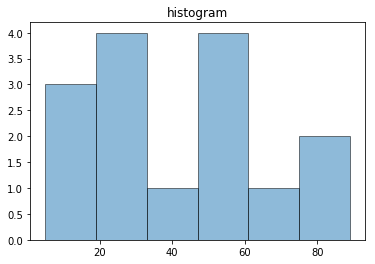

In [82]:
from math import log

def frequencyDistribution(x, n=None):
    """Creates a histogram displaying a frequency distribution of data.
    Especially useful for Nominal or Ordinal data
    
       Inputs
       -------
    x : numpy.array object
        The dataset
    n : int
        Number of bins (classes) to use to group the data. If n is
        not supplied, it will be calculated using Scott's Rule
    """
    # x = dataSet (python list)
    # n = number of bins

    stats = descriptiveAnalysis(x,False, False)
    
    # if number of bins is not supplied, use Scott's Rules
    if not n:
        n = round(3.5*stats['stdev']*len(x)**(-1/3))
        
    # Create Bins array
    bins = []
    binSize = round(stats['range'] / n)
    for i in range(0,n+1):
        bins.append(stats['min'] + i*binSize)
    
    hist, bins = np.histogram(x, bins)
    plt.hist(x, bins, alpha=0.5, ec='black')
    plt.title("histogram")
    plt.show()
    
x = np.array([22,87,5,43,56,73,55,54,11,20,51,5,79,31,27])
frequencyDistribution(x,6)


In [28]:
from statistics import mean
from math import sqrt

def correlationCoefficient(x,y):
    assert len(x) == len(y), "Datasets must be the same length"
        
    n = len(x)
    num1 = sum([i * j for i, j in zip(x,y)])
    num2 = n * mean(x) * mean(y)
    den1 = sum([i**2 for i in x]) - n * mean(x)**2
    den2 = sum([i**2 for i in y]) - n * mean(y)**2
    print((num1 - num2) / (sqrt(den1) * sqrt(den2)))
    
x = [95,85,80,70,60,]
y = [85,95,70,65,70]

correlationCoefficient(x,y)

0.6930525298193005


In [4]:
a = [4,6,2,3,5]
a.sort()
a

[2, 3, 4, 5, 6]

Estimated coefficients:
b_0 = 26.78082191780822 
b_1 = 0.6438356164383562


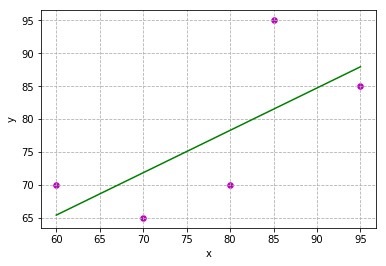

In [63]:
import numpy as np 
import matplotlib.pyplot as plt 

def simpleRegression(x, y): 
    # number of observations/points 
    assert len(x) == len(y), "Datasets must be the same length"
    
    n = np.size(x) 

    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 

    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 

    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 

    return(b_0, b_1) 

def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
            marker = "o", s = 30) 

    # predicted response vector 
    y_pred = b[0] + b[1]*x 

    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 

    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y')

    # function to show plot 
    plt.grid(linestyle='--')
    plt.show() 

def main(): 
    # observations 
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 
    
    x = np.array([95,85,80,70,60,])
    y = np.array([85,95,70,65,70])

    # estimating coefficients 
    b = simpleRegression(x, y) 
    print("Estimated coefficients:\nb_0 = {} \nb_1 = {}".format(b[0], b[1])) 

    # plotting regression line 
    plot_regression_line(x, y, b) 

if __name__ == "__main__": 
    main()
 




In [36]:
from math import sqrt

x = [1,1,1,1,0]
y = [1,0,1,0,4]

def euclideanDistance(x,y):
    distance = sqrt( sum( [ abs( i-j ) for i,j in zip(x,y)]))
    return distance

euclideanDistance(x,y)

2.449489742783178

In [38]:
'''A confusion matrix is a table that is often used to describe the performance of a classification model 
(or "classifier") on a set of test data for which the true values are known.'''

import numpy

def confusionMatrix(A):
    # A is a numpy matrix of the form [True Positive, False Positive; False Negative, True Negative]
    # total =  tp + fp + fn + tn
    total = A.sum()
    
    tp, fp, fn, tn = A[1,1], Ap[1,2], A[2,1], A[2,2] 
    
    accuracy = (tp + tn) / total # value ranging [0,1], best case fn = fp = 0 and accuracy = 1.
    error_rate = 1 - accuracy
    positivePredictiveValue = tp / (tp + fp)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    
    

In [26]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier
    
    Parameters
    -----------
    eta: float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training data set
        
    Attributes
    ----------
    w_ : 1d-array
        weights after fitting
    errors_: list
        number of missclassifications in every epoch
    """
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """Fit training data
        
        Parameters
        -----------
        X: {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of
            samples and n_features is the number of features
        y : array-like, shape = [n_samples]
            Target values
            
        Returns
        --------
        self : object
        """
        
        # Initialize weight vector to zeros, adding length
        # one for the threshold / zero weight w0
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit setup"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versico

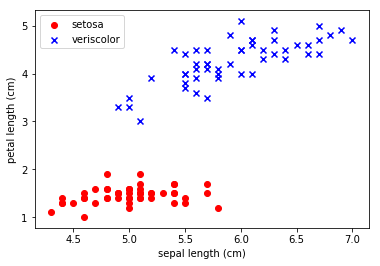

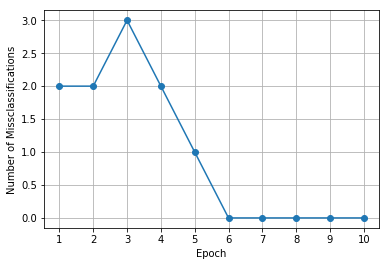

In [81]:
import pandas as pd
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
print(df.tail())

# Extract the fourth feature (collumn) from samples (rows) 0-100
y = df.iloc[0:100, 4].values
print(y)

# Replace asll instances of "Iris-setosa" with -1, else replace with +1
y = np.where(y == "Iris-setosa", -1, 1)
y

# Retrieve the 1st and 3rd feature (collumn) from the first 100 samples
# 1st feature is Sepal Length, 3rd feature is Petal Length
X = df.iloc[0:100, [0,2]].values
X

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='veriscolor')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.show()

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.grid(True)
plt.xticks(np.arange(1,11,1))
plt.xlabel('Epoch')
plt.ylabel('Number of Missclassifications')
plt.show()

0